In [2]:
import pandas as pd
import numpy as np
import os

In [71]:
import seaborn as sns

import scipy
import matplotlib.pyplot as plt
import scikitplot as skplt
from wordcloud import WordCloud

In [3]:
os.getcwd()

'/home/bhrt/Documents/14. NLP- Janta Hack'

In [7]:
os.listdir(os.chdir('/home/bhrt/Documents/14. NLP- Janta Hack/train'))

['__MACOSX', 'train.csv', 'game_overview.csv']

In [18]:
df = pd.read_csv('train.csv')
game_df = pd.read_csv('game_overview.csv')

# Deep dive into train.csv

In [30]:
df.shape

(17494, 5)

In [25]:
df.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [26]:
df.isna().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [64]:
df.head(2)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1


# ----------------------

# Title

In [21]:
df['title'].value_counts()

Robocraft                                             842
Eternal Card Game                                     791
Heroes & Generals                                     745
War Thunder                                           720
Fractured Space                                       718
Bless Online                                          712
The Elder Scrolls®: Legends™                          565
Neverwinter                                           546
AdventureQuest 3D                                     519
theHunter Classic                                     518
Creativerse                                           492
DCS World Steam Edition                               488
Team Fortress 2                                       479
Infestation: The New Z                                479
PlanetSide 2                                          472
Path of Exile                                         458
SMITE®                                                454
Fallout Shelte

In [22]:
len(df['title'].unique())

44

there are 44 game title in this column

# Year

In [23]:
df['year'].value_counts()

2018.0    4822
2016.0    4226
2017.0    3890
2015.0    2460
2014.0    1499
2013.0     340
2012.0      65
2011.0      14
Name: year, dtype: int64

Thus the user_review are taken from 2011 to 2018

In [29]:
df['year'].isna().sum()

178

In [76]:
# df['year'].plot(kind='kde')

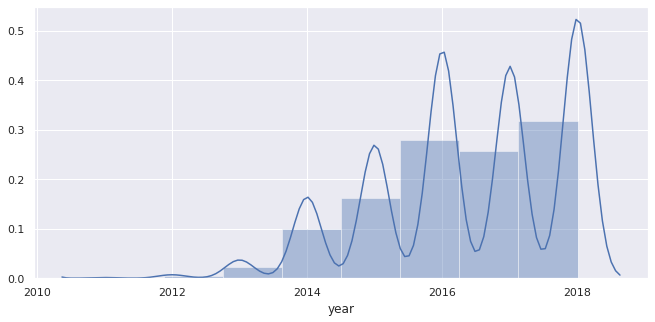

In [84]:
sns.distplot(df['year'] ,hist=True, bins=8)

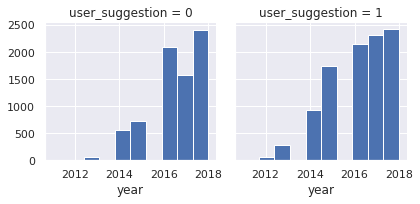

In [81]:
b = sns.FacetGrid(df, col="user_suggestion") 
b.map(plt.hist, "year")

# user_review

In [24]:
df['user_review'].head()

0    I'm scared and hearing creepy voices.  So I'll...
1    Best game, more better than Sam Pepper's YouTu...
2    A littly iffy on the controls, but once you kn...
3    Great game, fun and colorful and all that.A si...
4    Not many games have the cute tag right next to...
Name: user_review, dtype: object

# user_suggestion ----------------------- TARGET

### Recommended(1) and Not Recommended(0) by the user

In [27]:
df['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

thus it is a balanced distribution

##  <font color='red'>-------------------------------------------------------------------------------------------</font> 

## <font color='red'>-------------------------------------------------------------------------------------------</font> 

# Analysis game_df

In [31]:
game_df.shape

(64, 5)

In [32]:
game_df.describe()

,title,developer,publisher,tags,overview
count,64,64,64,64,64
unique,64,59,54,64,62
top,Star Trek Online,Cryptic Studios,Hi-Rez Studios,"['Free to Play', 'Card Game', 'Anime', 'Strate...",
freq,1,3,3,1,3


In [33]:
game_df.isna().sum()

title        0
developer    0
publisher    0
tags         0
overview     0
dtype: int64

In [35]:
game_df.head(2)

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...


# --------------------------

# 'title'

In [38]:
len(game_df['title'].unique())

64

all are unique titles; total 64

# developer

In [39]:
len(game_df['developer'].unique())

59

okay so there are 59 unique developers; almost unique

In [51]:
# game_df['developer'].value_counts()

- Cryptic Studios                         3
- Valve                                   2
- Daybreak Game Company                   2
- Wargaming Group Limited                 2

# publisher

In [52]:
len(game_df['publisher'].unique())

54

54 unique publisher

In [54]:
# game_df['publisher'].value_counts()

- Hi-Rez Studios                                 3
-  Daybreak Game Company                          3
- Perfect World Entertainment                    3
- Valve                                          3
- Wargaming Group Limited                        2
- Bethesda Softworks                             2

# tags

In [63]:
game_df['tags'][0] 

"['Horror', 'Free to Play', 'Cute', 'First-Person', 'Singleplayer', 'Psychological Horror', 'Indie', 'Adventure', 'Dark', 'Funny', 'Atmospheric', 'Action', 'Walking Simulator', 'Survival', 'Survival Horror', 'Anime', 'Gore', 'Comedy', 'Multiplayer', 'Illuminati']"

# overview

In [62]:
game_df['overview'].head(4)

0    Can you survive 1000 rooms of cute terror? Or ...
1    The latest entry in the Sakura series is more ...
2    Free to play shooter about the confrontation o...
3    Take the helm of a gigantic capital ship and g...
Name: overview, dtype: object